In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import export_graphviz
import graphviz

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
dtree = DecisionTreeClassifier(random_state=42, max_depth=3)  
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [5]:
y_pred_tree = dtree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



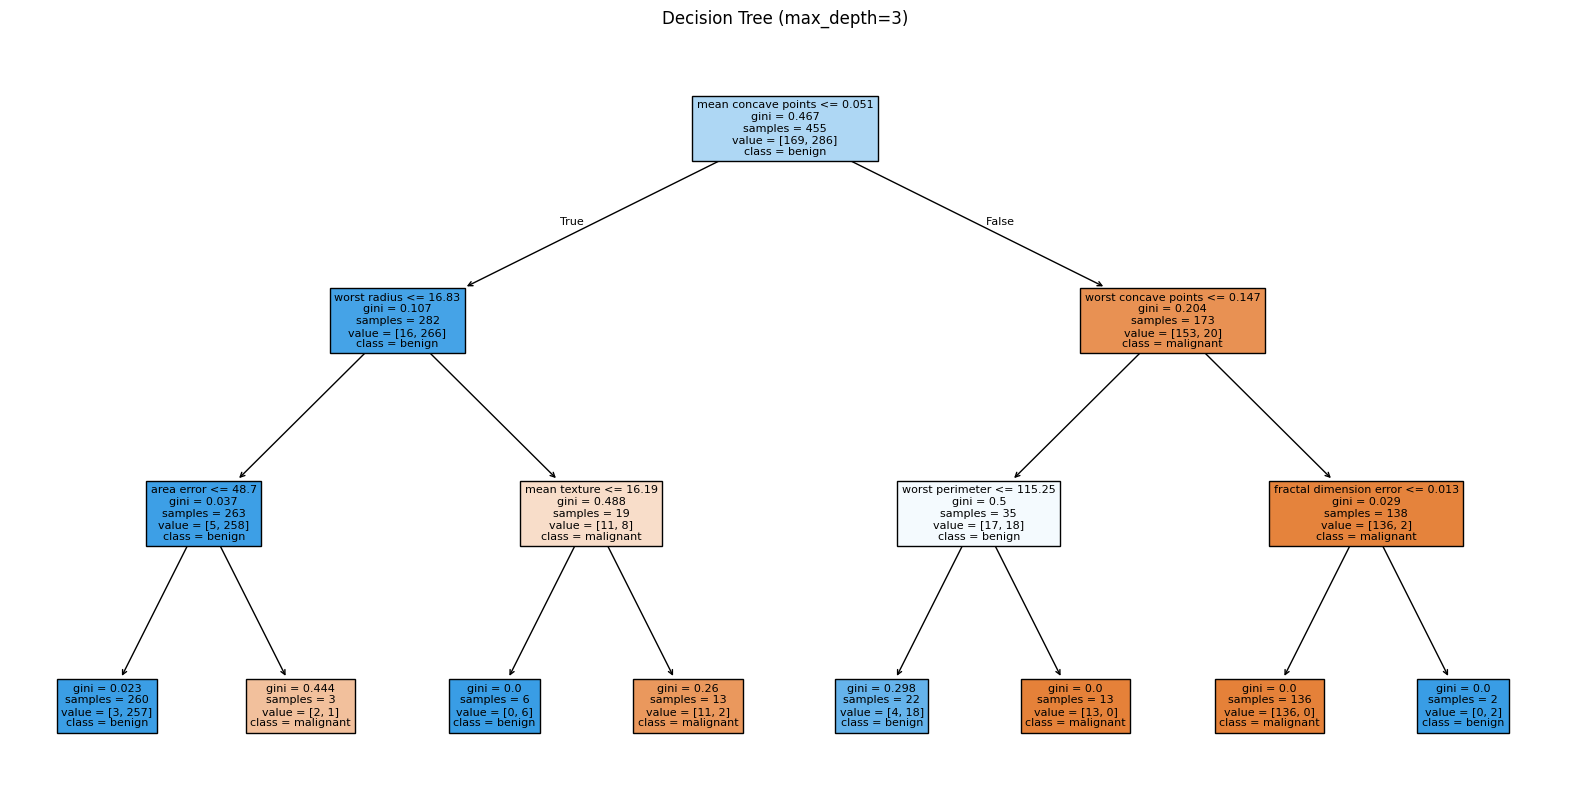

In [6]:
plt.figure(figsize=(20, 10))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=data.target_names)
plt.title("Decision Tree (max_depth=3)")
plt.show()

In [7]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



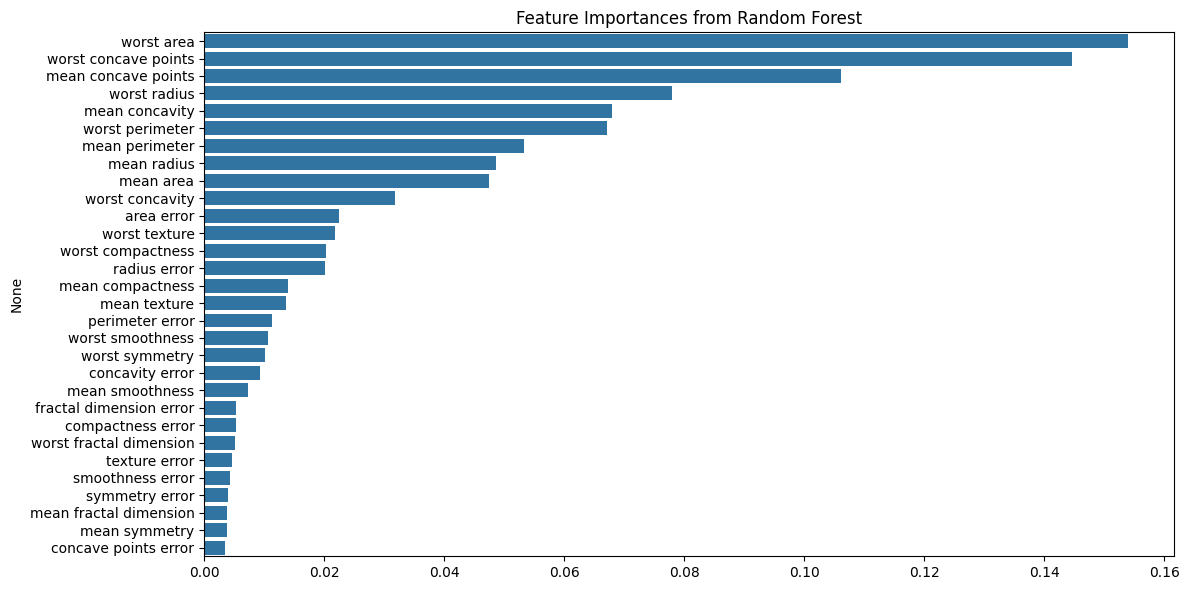

In [9]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importances from Random Forest")
plt.tight_layout()
plt.show()

In [10]:
dt_cv_scores = cross_val_score(dtree, X, y, cv=5)
rf_cv_scores = cross_val_score(rf, X, y, cv=5)

print("Decision Tree Cross-Validation Accuracy:", dt_cv_scores.mean())
print("Random Forest Cross-Validation Accuracy:", rf_cv_scores.mean())

Decision Tree Cross-Validation Accuracy: 0.9191119391398852
Random Forest Cross-Validation Accuracy: 0.9560937742586555
